# 2 hidden QHO

## Variational Wavefunction

In [1]:
function Ψ(x,b,c1,c2,W1,W2)
    return exp(x*b)*(1+exp(c1+x*W1))*(1+exp(c2+x*W2))
end

Ψ (generic function with 1 method)

In [2]:
Ψ(0,0,0,0,0,0)

4.0

In [3]:
using Plots

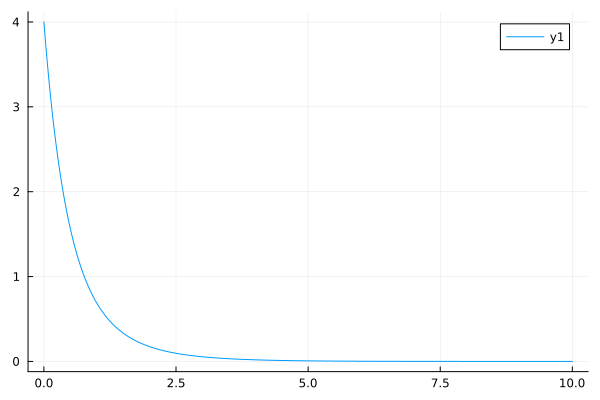

In [4]:
x = range(0, 10, length=1000)
y = Ψ.(x,-1,0,0,-1,-1)
plot(x,y)

We want that $\Psi\to 0$ as $x\to \pm \infty$. In this case, it is not the behaviour. Because the wavefuntion is not 0 anywhere, the excited states are not gonna be reproduced, so it should converge to the ground state. If the first condition is not satisfied...

Useful function

In [5]:
function σ(x)
    return 1/(1+ℯ^(-x))
end

σ (generic function with 1 method)

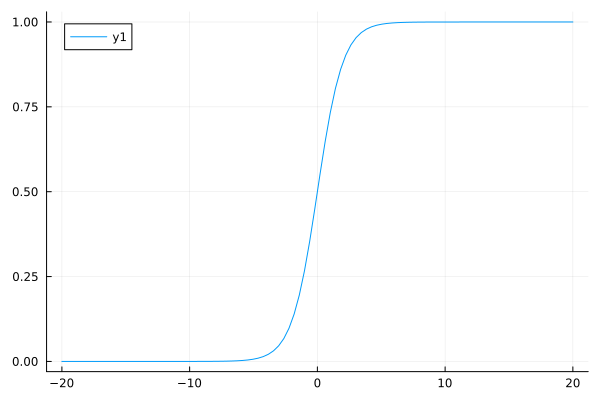

In [6]:
x = range(-20, 20, length=100)
y = σ.(x)
plot(x,y)

## Variational Energy

Definition of the variational energy

In [11]:
using QuadGK

function numerator(x,b,c1,c2,W1,W2)
    σ1=σ(c1+x*W1)
    σ2=σ(c2+x*W2)
    ξ=b^2 + 2*b*(W1*σ1 + W2*σ2)+(W1^2)*σ1+(W2^2)*σ2+2*W1*W2*σ1*σ2
    return (Ψ(x,b,c1,c2,W1,W2))^2*(x^2-ξ)
end



function energy(b,c1,c2,W1,W2,inf=-20,sup=20)
    integral_num, err    = quadgk(x->numerator(x,b,c1,c2,W1,W2), inf,sup)
    integral_denom, err2 = quadgk(x->((Ψ(x,b,c1,c2,W1,W2))^2), inf,sup)
    return 0.5*integral_num/integral_denom
end

energy (generic function with 3 methods)

In [16]:
energy(-1,0,0,-1,-1,0,40)

-1.886776485788113

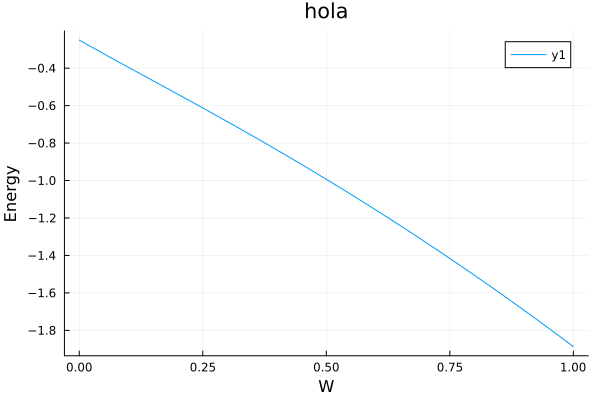

In [22]:
x = range(0, 1, length=100)
y = energy.(-1,0,0,-x,-x,0,20)
plot(x,y)
title!("Wnweg")
xlabel!("W")
ylabel!("Energy")

## Gradient of the Variational Energy with respect to the RBM parameters

Definition of the gradient of some parts of the full grad

In [ ]:
function ∇ξ(x,b,c1,c2,W1,W2)
    σ1  = σ(c1+x*W1)
    σ2  = σ(c2+x*W2)

    ∂b  = 2(b+σ1*W1+σ2*W2)
    ∂c1 = 2*b*W1*σ1*(1-σ1) + W1^2*σ1*(1-σ1) + 2*W1*W2*σ1*(1-σ1)*σ2
    ∂c2 = 2*b*W2*σ2*(1-σ2) + W2^2*σ2*(1-σ2) + 2*W1*W2*σ2*(1-σ2)*σ1
    ∂W1 = 2*b*(σ1+W1*σ1*(1-σ1)*x) + 2*W1*σ1 + W1^2*σ1*(1-σ1)*x + 2*σ2*W2*(σ1+W1*σ1*(1-σ1)*x)
    ∂W2 = 2*b*(σ2+W2*σ2*(1-σ2)*x) + 2*W2*σ2 + W2^2*σ2*(1-σ2)*x + 2*σ1*W1*(σ2+W2*σ2*(1-σ2)*x)
    return ∂b+∂c1+∂c2+∂W1+∂W2
end

function ∇Ψ(x,b,c1,c2,W1,W2)
    σ1  = σ(c1+x*W1)
    σ2  = σ(c2+x*W2)
    return Ψ(x,b,c1,c2,W1,W2) * (σ1+σ2+x*(1+σ1+σ2))

